# Data Preparations

Download dataset menggunakan API Kaggle

In [ ]:
# Load Kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download dataset
!kaggle datasets download -d arshid/iris-flower-dataset -p /content/dataset
!unzip "/content/dataset/iris-flower-dataset.zip" -d "/content/dataset/"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/dataset/iris-flower-dataset.zip, /content/dataset/iris-flower-dataset.zip.zip or /content/dataset/iris-flower-dataset.zip.ZIP.


Import module python yang akan digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

Dataset dijadikan sebuah dataframe pandas, features (sepal_length, sepal_width, petal_length, petal_width) pada dataset dijadikan variable x dan labels (species) pada data dijadikan variable y

In [ ]:
# load dataset as pandas dataframe
df = pd.read_csv ('/content/dataset/IRIS.csv')
df.info()
print(df.head())

# features to x var
x = df.iloc[:, [0,1,2,3]].values
# labels to y var
y = df.iloc[:, -1].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Dilakukan visualisasi data yang digunakan, dapat dilihat bahwa tiap species bunga masing-masing memiliki jumlah sebesar 33.3% dari total dataset

Dilakukan juga visualisasi distribusi panjang dan lebar petal bunga, dan dapat dilihat bahwa Iris-setosa cenderung memiliki petal yang berukuran kecil, Iris-Versicolor cenderung berukuran sedang, dan Iris-virginica cenderung berukuran besar

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64


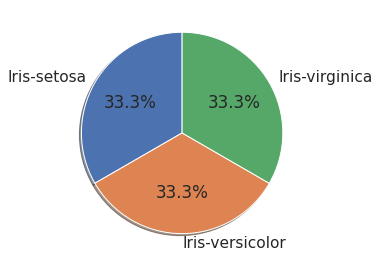

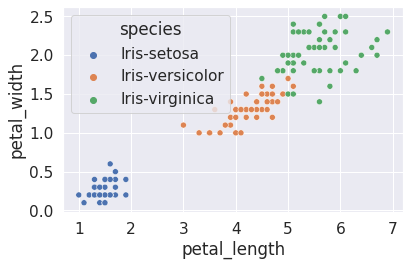

In [ ]:
print(df.species.value_counts())

# visualisasi species tanaman
fig1, ax1 = plt.subplots()
ax1.pie(df.species.value_counts(), labels=df.species.unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.tight_layout()

# distribusi panjang dan lebar petal bunga
fig1, ax1 = plt.subplots()
sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.species)
plt.tight_layout()

Lakukan label encoding pada label 'species'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encoding labels pada kolom species
label_encoding = LabelEncoder()
df['species'] = label_encoding.fit_transform(df['species'])
df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,2
47,4.6,3.2,1.4,0.2,0
83,6.0,2.7,5.1,1.6,1
62,6.0,2.2,4.0,1.0,1
68,6.2,2.2,4.5,1.5,1
30,4.8,3.1,1.6,0.2,0


# Test-Split

Saya menggunakan Train-Test Split dengan data Training: 75%, Data Uji: 25% 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred  =  classifier.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

confusion matrix: 


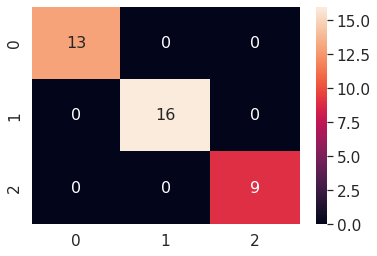

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test, y_pred))


print("confusion matrix: ")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3), range(3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Kernel SVM dengan Kernel Gaussian

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

confusion matrix: 


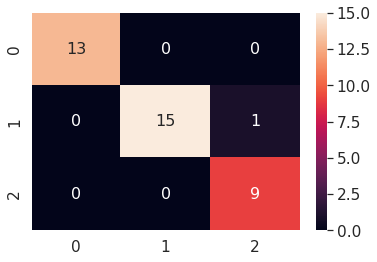

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print("confusion matrix: ")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3), range(3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Kesimpulan

Pada quiz ini saya menggunakan dua algoritma klasifikasi yaitu **Gaussian Naive Bayes Classifier** dan **Kernel SVM dengan Kernel Gaussian**. 

Jumlah Dataset sebanyak 150 saya bagi menjadi 75% sebagai data training + 25% sebagai data uji Preprocessing yang dilakukan pada dataset adalah encoding pada label 'spesies'.

Dari hasil yang telah didapatkan, akurasi dari **Gaussian Naive Bayes Classifier** sebesar 100%, sedangkan  **Kernel SVM dengan Kernel Gaussian** sebesar 97%.